# EDA - Ejemplo - Sleep

**Contexto**  
Este conjunto de datos contiene el detalle de variables relacionadas con el sueño y hábitos diarios.

**Contenido**  
El conjunto de datos proviene de kaggle: [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset).  
Contiene 400 renglones con las siguientes columnas:  

| Variable                | Definición                                       | Valor                       |
| ----------------------- | ------------------------------------------------ | --------------------------- |
| Person ID               | Id persona                                       | Numérico                    |
| Gender                  | Genero de la persona                             | Female, Male                |
| Age                     | Edad de la persona                               | Años                        |
| Occupation              | Ocupación de la persona                          | String                      |
| Sleep Duration          | Número de horas que duerme por día               | Horas                       |
| Quality of Sleep        | Calidad del sueño                                | 1 a 10                      |
| Physical Activity Level | Minutos que dedica a actividades físicas diarias | Minutos por día             |
| Stress Level            | Nivel de stress experimentado                    | 1 a 10                      |
| BMI Category            | Indice de masa muscular                          | String                      |
| Blood Pressure          | Presión arterial (sistólica/diastólica)          | String                      |
| Heart Rate              | Ritmo cardiaco en reposo                         | Latidos por minuto          |
| Daily Steps             | Número de pasos que realiza por dia              | Pasos por día               |
| Sleep Disorder          | Desorden de sueño **(variable objetivo)**        | None, Insomnia, Sleep Apnea |

**Planteamiento del problema**  
Se busca predecir si el cliente presentará algún desorden del sueño, de acuerdo sus las características.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Renombrar columnas
df.columns = ['id_persona', 'genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad',
              'nivel_stress', 'indice_corporal', 'presion_sanguinea', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']

## Mapeos

In [4]:
print(df['genero'].unique())

['Male' 'Female']


In [ ]:
## Escribe tu código aqui

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
print(df['ocupacion'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [7]:
df['ocupacion'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: ocupacion, dtype: int64

In [8]:
# Mapeos
df.replace('Manager',              '0', inplace=True)
df.replace('Sales Representative', '1', inplace=True)
df.replace('Scientist',            '2', inplace=True)
df.replace('Software Engineer',    '3', inplace=True)
df.replace('Salesperson',          '4', inplace=True)
df.replace('Accountant',           '5', inplace=True)
df.replace('Teacher',              '6', inplace=True)
df.replace('Lawyer',               '7', inplace=True)
df.replace('Engineer',             '8', inplace=True)
df.replace('Doctor',               '9', inplace=True)
df.replace('Nurse',                '10', inplace=True)
df = df.astype({'ocupacion':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
print(df['indice_corporal'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [10]:
df['indice_corporal'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: indice_corporal, dtype: int64

In [11]:
df.replace('Normal',        '0', inplace=True)
df.replace('Normal Weight', '0', inplace=True)
df.replace('Overweight',    '1', inplace=True)
df.replace('Obese',         '2', inplace=True)
df = df.astype({'indice_corporal':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


In [12]:
df[['sistolica', 'diastolica']] = df['presion_sanguinea'].str.split('/', expand=True)
df = df.astype({'sistolica':'int'})
df = df.astype({'diastolica':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,None,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,None,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,140,90


In [13]:
print(df['desorden'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [14]:
df.replace('None',        '0', inplace=True)
df.replace('Sleep Apnea', '1', inplace=True)
df.replace('Insomnia',    '2', inplace=True)
df = df.astype({'desorden':'int'})
df.head()

,id_persona,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,presion_sanguinea,ritmo_cardiaco,pasos_diarios,desorden,sistolica,diastolica
0,1,1,27,3,6.1,6,42,6,1,126/83,77,4200,0,126,83
1,2,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
2,3,1,28,9,6.2,6,60,8,0,125/80,75,10000,0,125,80
3,4,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90
4,5,1,28,1,5.9,4,30,8,2,140/90,85,3000,1,140,90


In [15]:
# Seleccionar columnas
df = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios', 'desorden']]
df.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios,desorden
0,1,27,3,6.1,6,42,6,1,126,83,77,4200,0
1,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
2,1,28,9,6.2,6,60,8,0,125,80,75,10000,0
3,1,28,1,5.9,4,30,8,2,140,90,85,3000,1
4,1,28,1,5.9,4,30,8,2,140,90,85,3000,1


## EDA

In [ ]:
# Revisar los datos
## Escribe tu código aqui

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genero           374 non-null    int32  
 1   edad             374 non-null    int64  
 2   ocupacion        374 non-null    int32  
 3   duracion_sueño   374 non-null    float64
 4   calidad_sueño    374 non-null    int64  
 5   nivel_actividad  374 non-null    int64  
 6   nivel_stress     374 non-null    int64  
 7   indice_corporal  374 non-null    int32  
 8   sistolica        374 non-null    int32  
 9   diastolica       374 non-null    int32  
 10  ritmo_cardiaco   374 non-null    int64  
 11  pasos_diarios    374 non-null    int64  
 12  desorden         374 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 29.3 KB


In [ ]:
## Escribe tu código aqui

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios,desorden
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,7.425134,7.132086,7.312834,59.171123,5.385027,0.449198,128.553476,84.649733,70.165775,6816.844920,0.620321
std,0.500641,8.673133,2.133232,0.795657,1.196956,20.830804,1.774526,0.549274,7.748118,6.161611,4.135676,1617.915679,0.805620
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,115.000000,75.000000,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,6.000000,6.400000,6.000000,45.000000,4.000000,0.000000,125.000000,80.000000,68.000000,5600.000000,0.000000
50%,1.000000,43.000000,8.000000,7.200000,7.000000,60.000000,5.000000,0.000000,130.000000,85.000000,70.000000,7000.000000,0.000000
75%,1.000000,50.000000,9.000000,7.800000,8.000000,75.000000,7.000000,1.000000,135.000000,90.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,2.000000,142.000000,95.000000,86.000000,10000.000000,2.000000


In [ ]:
# Revisar las relaciones entre los datos
## Escribe tu código aqui

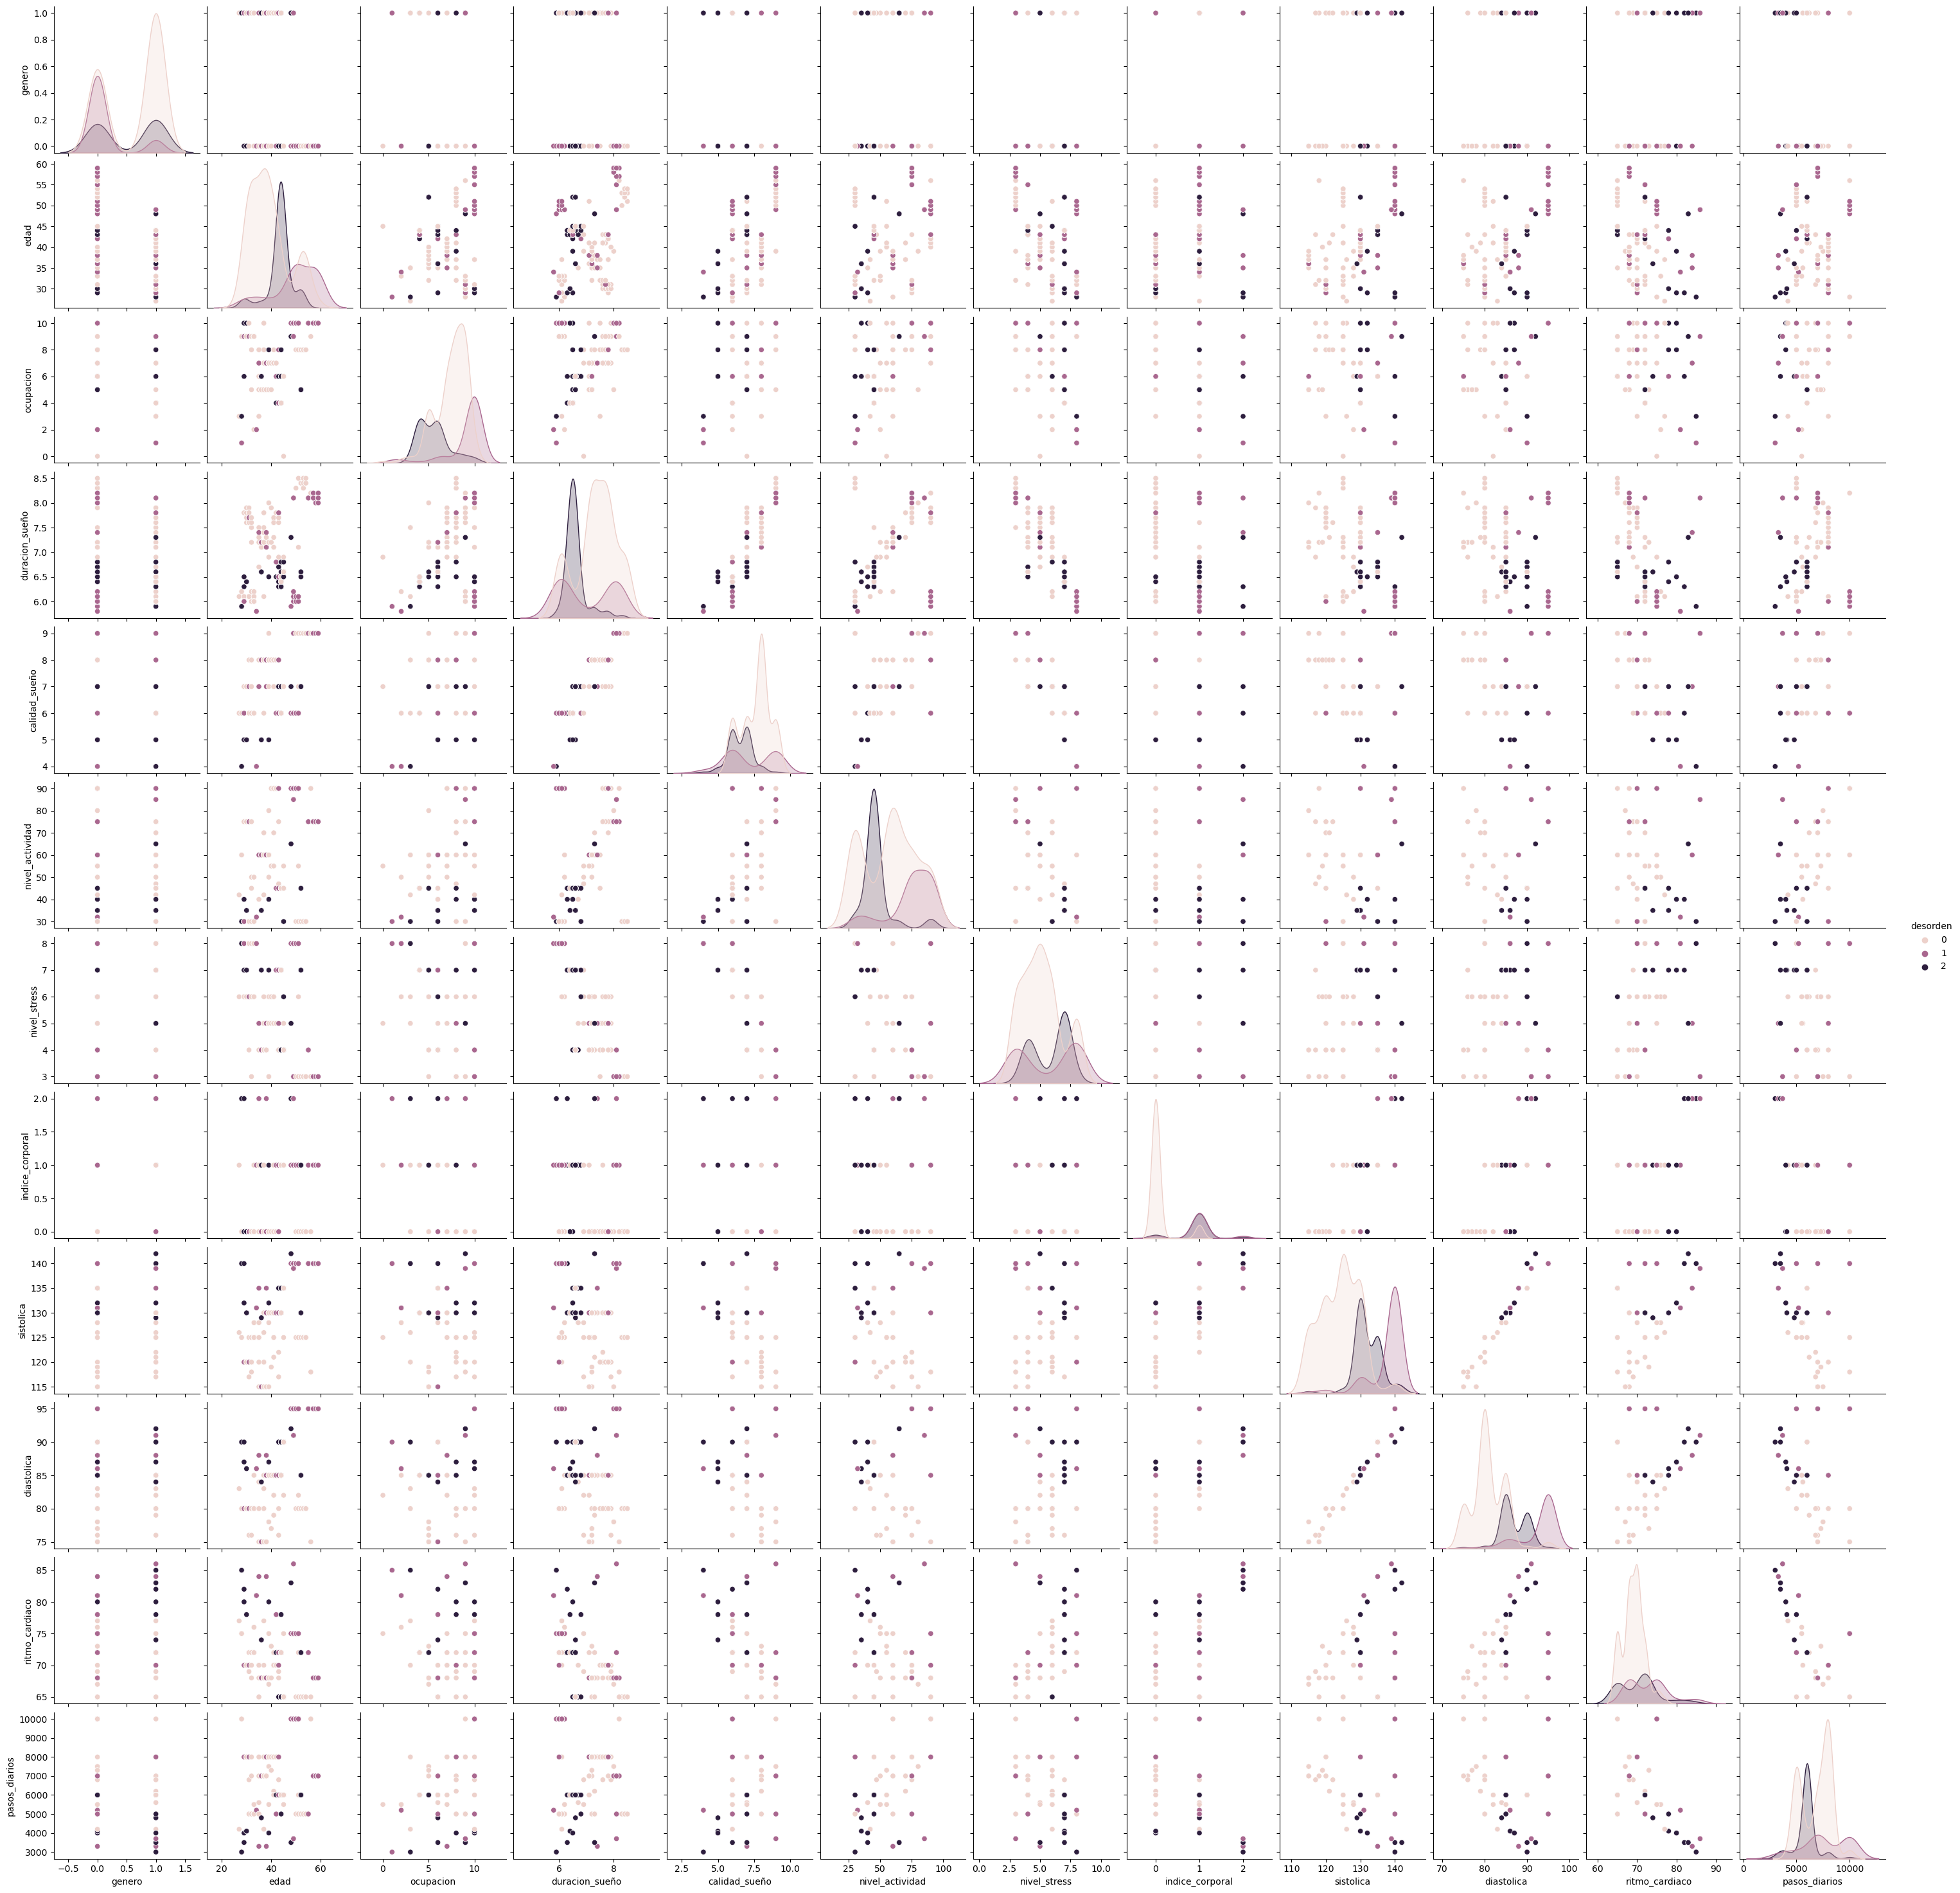

In [ ]:
## Escribe tu código aqui

<Axes: >

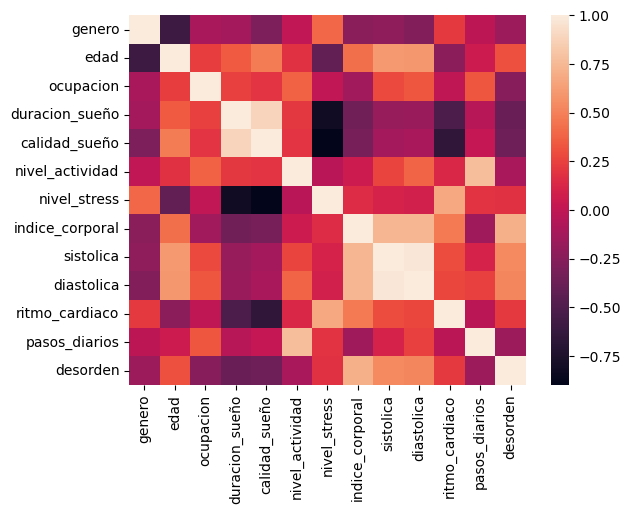

## Normalización

In [20]:
# Variables independientes
X = df[['genero', 'edad', 'ocupacion', 'duracion_sueño', 'calidad_sueño', 'nivel_actividad', 'nivel_stress', 
         'indice_corporal', 'sistolica', 'diastolica', 'ritmo_cardiaco', 'pasos_diarios']]
X.head()

,genero,edad,ocupacion,duracion_sueño,calidad_sueño,nivel_actividad,nivel_stress,indice_corporal,sistolica,diastolica,ritmo_cardiaco,pasos_diarios
0,1,27,3,6.1,6,42,6,1,126,83,77,4200
1,1,28,9,6.2,6,60,8,0,125,80,75,10000
2,1,28,9,6.2,6,60,8,0,125,80,75,10000
3,1,28,1,5.9,4,30,8,2,140,90,85,3000
4,1,28,1,5.9,4,30,8,2,140,90,85,3000


In [21]:
# Normalizar
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[ 0.9893614  -1.75309569 -2.07715841 ... -0.26810236  1.6547187
  -1.61958404]
 [ 0.9893614  -1.63764266  0.73924248 ... -0.7556402   1.17047394
   1.97007745]
 [ 0.9893614  -1.63764266  0.73924248 ... -0.7556402   1.17047394
   1.97007745]
 ...
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]
 [-1.010753    1.94140144  1.20864263 ...  1.68204901 -0.52438269
   0.11335599]]


In [22]:
# Variable dependiente
y = df[['desorden']]
y.head()

,desorden
0,0
1,0
2,0
3,1
4,1


In [23]:
print('X:', len(X_adj), 'y:', len(y))

X: 374 y: 374
